금리에 따른 target 상관관계

In [1]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd
from matplotlib import rc  ### 이 줄과
# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
import numpy as np

import module
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# 모든 행 출력 설정
pd.set_option('display.max_rows', None)


rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# AppleGothic
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [3]:
dt = module.file_load.load_current_version()

In [4]:
dt.shape

(1128094, 95)

In [5]:
dt.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [6]:
dt[['금리_6개월전', '금리_1년전', '금리_1년6개월전','금리_2년전']].isnull().sum()

KeyError: "None of [Index(['금리_6개월전', '금리_1년전', '금리_1년6개월전', '금리_2년전'], dtype='object')] are in the [columns]"

In [7]:
df = dt.copy()
module.parser.시_군_구_add(dt)

In [8]:
df['금리_단기1년전차이'] = df['금리'] - df['금리_1년전']
df['금리_단기6개월차이'] = df['금리'] - df['금리_6개월전']

In [9]:
df[[f'금리_{period}' for period in ['6개월전', '1년전', '1년6개월전', '2년전', '단기1년전차이','단기6개월차이']] + ['target']]

,금리_6개월전,금리_1년전,금리_1년6개월전,금리_2년전,금리_단기1년전차이,금리_단기6개월차이,target
0,1.25,1.25,1.50,1.50,0.25,0.25,124000.0
1,1.25,1.25,1.25,1.50,0.25,0.25,123500.0
2,1.25,1.25,1.25,1.50,0.25,0.25,91500.0
3,1.25,1.25,1.25,1.50,0.25,0.25,130000.0
4,1.25,1.25,1.25,1.50,0.25,0.25,117000.0
...,...,...,...,...,...,...,...
1118817,4.50,4.25,3.75,3.25,0.50,0.25,20000.0
1118818,4.50,4.50,4.00,3.25,0.50,0.50,20000.0
1118819,4.50,4.50,4.00,3.25,0.50,0.50,28000.0
1118820,4.50,4.50,4.00,3.25,0.50,0.50,29000.0


금리변화_6개월전       0.018763
금리변화_1년전        0.029401
금리변화_1년6개월전     0.009912
금리변화_2년전        0.003616
금리변화_단기1년전차이   -0.269608
금리변화_단기6개월차이   -0.261037
금리             -0.252540
Name: target, dtype: float64


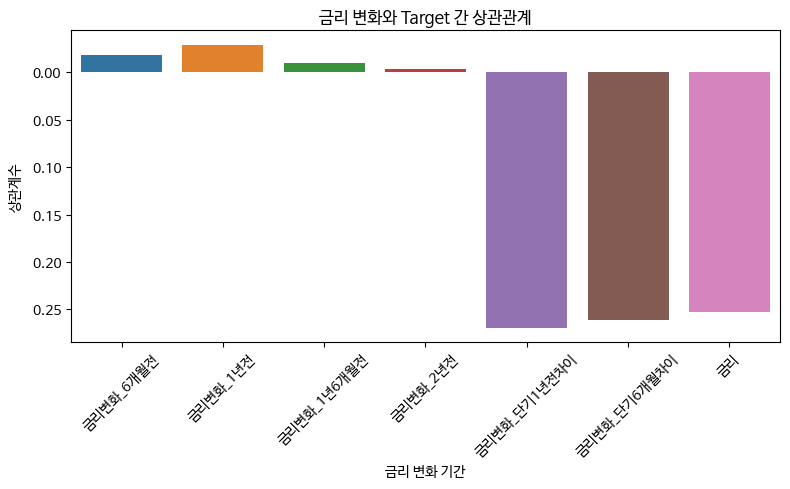

In [10]:

# 금리 변화율 계산

for period in ['6개월전', '1년전', '1년6개월전', '2년전', '단기1년전차이','단기6개월차이']:
    df[f'금리변화_{period}'] = df['금리'] - df[f'금리_{period}']

# target과 금리 변화의 상관관계 계산
correlations = df[[f'금리변화_{period}' for period in ['6개월전', '1년전', '1년6개월전', '2년전', '단기1년전차이','단기6개월차이']] + ['금리', 'target']].corr()

# target과 관련된 상관관계만 추출
target_correlations = correlations['target'].drop('target')

# 상관관계 출력
print(target_correlations)
# plt.rcParams['axes.unicode_minus'] = False

# 상관관계 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=target_correlations.index, y=target_correlations.values)
plt.title('금리 변화와 Target 간 상관관계')
plt.xlabel('금리 변화 기간')
plt.ylabel('상관계수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"1년전 금리" 와 "거래일기준 1년전 금리와의 차이 금리" 가 유의미한 관계로 보인다.

In [11]:
df.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target', '계약년도-월-일', '계약년도_6개월전', '계약년도_1년전',
       '계약년도_1년6개월전', '계약년도_2년전', '금리', '금리_6개월전', '금리_1년전', '금리_1년6개월전',
       '금리_2년전', '금리_단기1년전차이', '금리_단기6개월차이', '금리변화_6개월전', '금리변화_1년전',
       '금리변화_1년6개월전', '금리변화_2년전', '금리변화_단기1년전차이', '금리변화_단기6개월차이'],
      dtype='object')

In [13]:
target_columns = ['금리','금리변화_6개월전',
       '금리변화_1년전', '금리변화_1년6개월전', '금리변화_2년전', '금리변화_단기1년전차이', '금리변화_단기6개월차이']

In [22]:
df2 = df.copy()
module.parser.계약년도_add(df2)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Mock data 생성
np.random.seed(0)
target_columns = ['금리','금리변화_6개월전',
       '금리변화_1년전', '금리변화_1년6개월전', '금리변화_2년전', '금리변화_단기1년전차이', '금리변화_단기6개월차이']

# 2개씩 가로로 설정
fig, axes = plt.subplots(len(target_columns) // 2 + len(target_columns) % 2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(target_columns):
    # 계약년월 기준으로 데이터 정렬
    df2 = df2.sort_values(by='계약년도')

    # 금리와 거래가격의 평균을 계약년월별로 계산
    summary = df2.groupby('계약년도')[[column, 'target']].mean().reset_index()

    # 첫 번째 y축: 거래가격
    ax1 = axes[i]
    ax1.plot(summary['계약년도'], summary['target'], label='거래가격 (Transaction Price)', color='blue', marker='o', linestyle='-', linewidth=2)
    ax1.set_xlabel('계약년도', fontsize=12)
    ax1.set_ylabel('거래가격', fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # 두 번째 y축: 금리
    ax2 = ax1.twinx()
    ax2.plot(summary['계약년도'], summary[column], label='금리', color='red', marker='s', linestyle='--', linewidth=2)
    ax2.set_ylabel('금리', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # 그래프 제목
    ax1.set_title(f'금리와 거래가격의 상관관계_{column}', fontsize=14)

# 나머지 빈 플롯 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


# 결론
거래일 금리 - 1년전 금리차의 관계가 상관관계로 활용하면 좋을것 같다.